In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# get data
df = pd.read_csv('product_sales.csv')

In [4]:
# check data types for each column
print(df.dtypes)

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object


In [5]:
# check shape
print(df.shape)

(15000, 8)


# Data Validation

## Check for duplicates

In [6]:
print(df.duplicated().sum())

0


In [7]:
# no duplicates

## Check for null values

In [8]:
print(df.isnull().sum())
# only revenue has null values. but there are ways to indicate missing values other than null so i still have to check unique values for each column later

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


## Validate week

In [9]:
# correct dtype
# should be between 0 and 6
# no missing values
print(df['week'].unique())

[2 6 5 4 3 1]


## Validate sales_method

In [10]:
# correct dtype
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


In [11]:
# need to standardize the email and em + call methods
df.loc[df['sales_method'] == 'email', 'sales_method'] = 'Email'
df.loc[df['sales_method'] == 'em + call', 'sales_method'] = 'Email + Call'

# check results
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call']


## Validate customer_id

In [12]:
# since there are 15000 rows, there should also be 15000 unique customer id
unique_id = df['customer_id'].unique()
print(len(unique_id))

15000


In [13]:
print(len(df[df['customer_id'] == '_']))
print(len(df[df['customer_id'] == 'missing']))
print(len(df[df['customer_id'] == 'None']))

0
0
0


## Validate nb_sold

In [14]:
# nb_sold should be a positive integer. let us calculate the minimum and maximum values
min_value = df['nb_sold'].min()
max_value = df['nb_sold'].max()

print(f"Minimum value in nb_sold column: {min_value}")
print(f"Maximum value in nb_sold column: {max_value}")


Minimum value in nb_sold column: 7
Maximum value in nb_sold column: 16


## Validate revenue

In [15]:
# We know from earlier that the revenue column has 1047 missing values.
# Since the minimum nb_sold is 7, we cannot replace missing revenue with 0.
# Drop rows with missing revenue
df.dropna(subset=['revenue'], inplace=True)
df['revenue'] = df['revenue'].round(2)

## Validate years_as_customer

In [16]:
# years as customer should start from 0 to 39 (1984-2023)
print(df[(df['years_as_customer'] > 39) | (df['years_as_customer'] < 0)]['years_as_customer'])

13741    63
13800    47
Name: years_as_customer, dtype: int64


In [17]:
# The two outliers (47 and 63 will be replaced with the maximum allowed value of 39)
df.loc[(df['years_as_customer'] > 39) | (df['years_as_customer'] < 0), 'years_as_customer'] = 39

## Validate nb_site_visits

In [18]:
# check the values for this column
print(df['nb_site_visits'].value_counts().sort_index())

nb_site_visits
12       1
13       4
14       7
15      29
16      79
17     101
18     208
19     400
20     567
21     862
22    1135
23    1380
24    1477
25    1557
26    1524
27    1345
28    1074
29     821
30     609
31     329
32     234
33      99
34      40
35      27
36      13
37       4
Name: count, dtype: int64


In [19]:
# seems in order

## Validate state

In [20]:
# check values
print(df['state'].value_counts().sort_index())
print(len(df['state'].value_counts()))

state
Alabama            202
Alaska              35
Arizona            295
Arkansas           118
California        1739
Colorado           212
Connecticut        167
Delaware            27
Florida            826
Georgia            460
Hawaii              67
Idaho               59
Illinois           576
Indiana            327
Iowa               154
Kansas             129
Kentucky           202
Louisiana          213
Maine               60
Maryland           245
Massachusetts      270
Michigan           466
Minnesota          228
Mississippi        133
Missouri           286
Montana             43
Nebraska            86
Nevada              97
New Hampshire       48
New Jersey         402
New Mexico          79
New York           899
North Carolina     430
North Dakota        25
Ohio               520
Oklahoma           184
Oregon             214
Pennsylvania       553
Rhode Island        41
South Carolina     213
South Dakota        38
Tennessee          308
Texas             1109
Utah 

In [21]:
# 50 unique values representing the states of US

# Questions

##  How many customers were there for each approach?

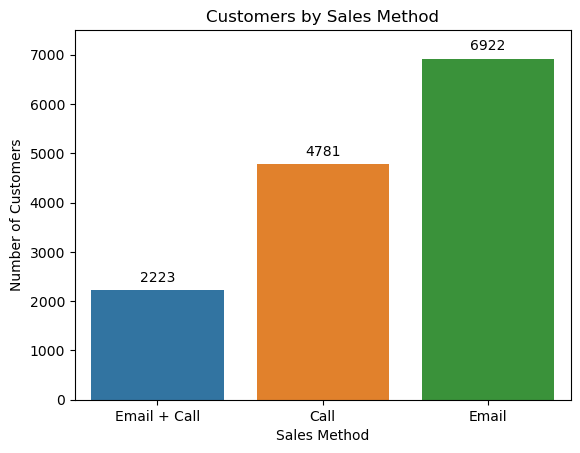

In [22]:
num_approach = sns.countplot(data=df, x='sales_method')
num_approach.set_title('Customers by Sales Method')
num_approach.set_xlabel('Sales Method')
num_approach.set_ylabel('Number of Customers')
num_approach.set_ylim(0, 7500)

for p in num_approach.patches:
    num_approach.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')

plt.show()

The most common sales method is email followed by call then a combinaton of the two.

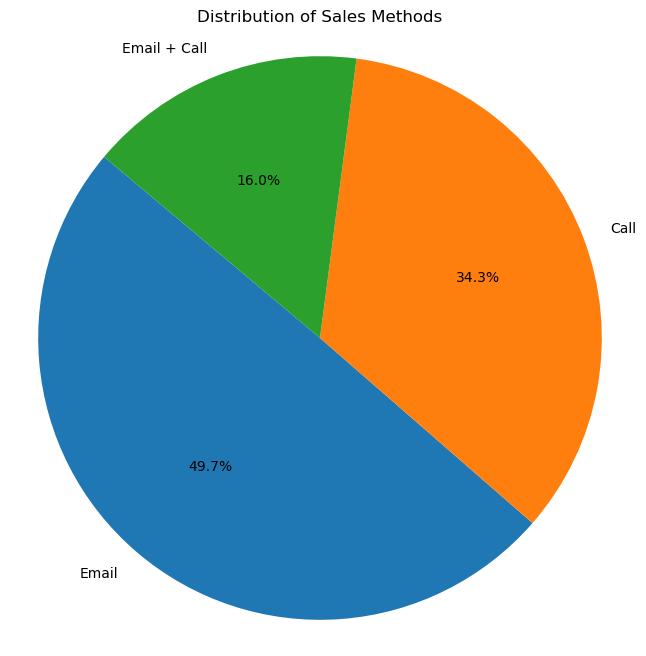

In [179]:
sales_method_counts = df['sales_method'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_method_counts, labels=sales_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##  What does the spread of the revenue look like overall? And for each method?

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


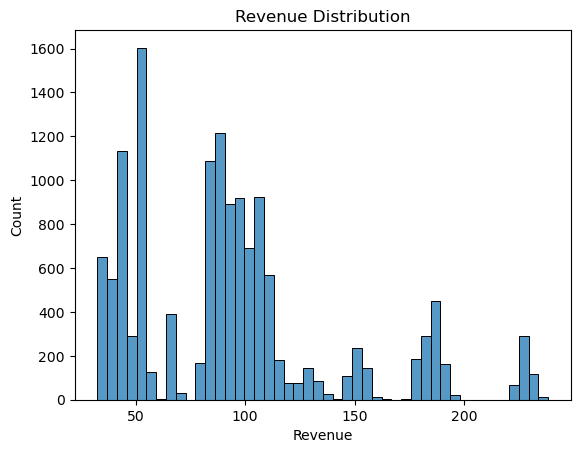

In [180]:
revenue_spread = sns.histplot(data=df, x='revenue')
revenue_spread.set_title('Revenue Distribution')
revenue_spread.set_xlabel('Revenue')
plt.show()

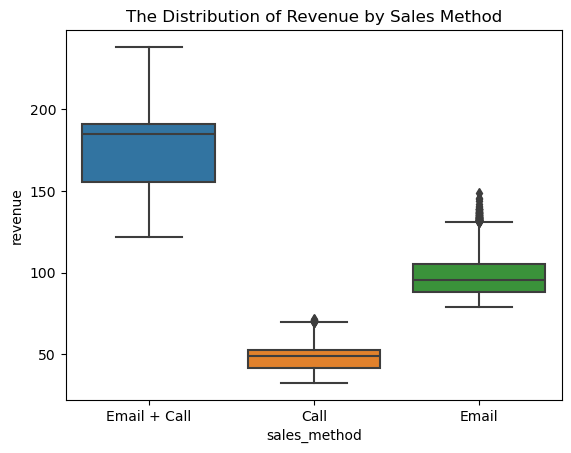

In [181]:
revenue_method = sns.boxplot(data=df, x='sales_method', y='revenue')
revenue_method.set_title('The Distribution of Revenue by Sales Method')
plt.show()

In [186]:
median_revenue_by_method = df.groupby('sales_method')['revenue'].median()
print(median_revenue_by_method)

sales_method
Call             49.07
Email            95.58
Email + Call    184.74
Name: revenue, dtype: float64


C:\Users\Joseph\AppData\Local\Temp\ipykernel_15436\2711592456.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sales_method', y='revenue', estimator='mean', ci=None)


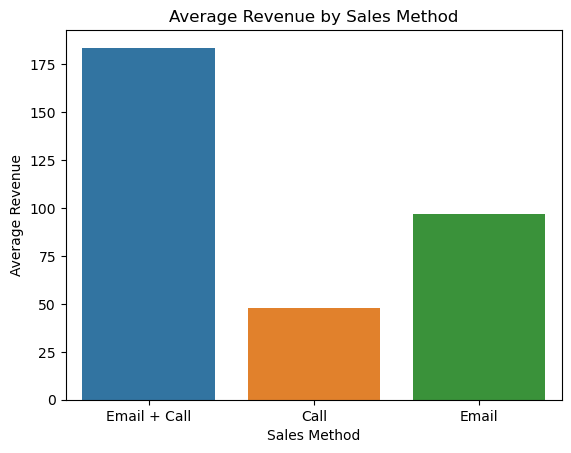

In [182]:
sns.barplot(data=df, x='sales_method', y='revenue', estimator='mean', ci=None)

# Set the title and labels
plt.title('Average Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')

# Show the plot
plt.show()

C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Joseph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


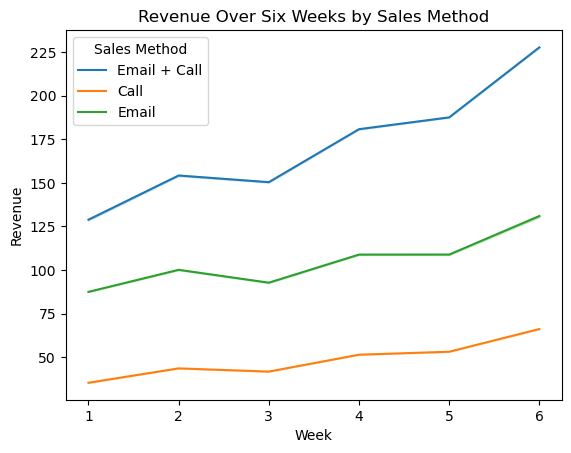

In [183]:
week_revenue = sns.lineplot(data=df, x='week', y='revenue', hue='sales_method')
week_revenue.set_title('Revenue Over Six Weeks by Sales Method')
week_revenue.set_xlabel('Week')
week_revenue.set_ylabel('Revenue')
week_revenue.legend(title='Sales Method')
plt.show()

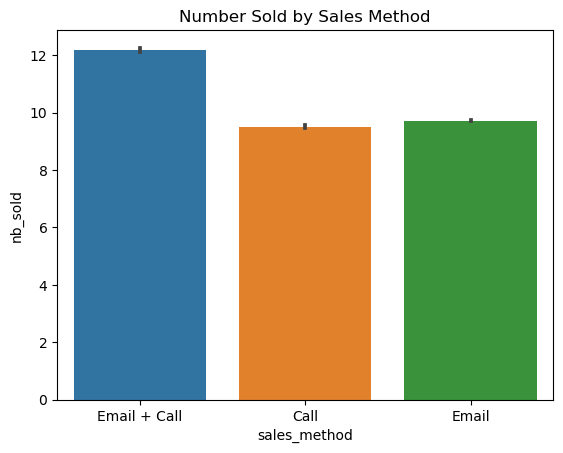

In [184]:
nb_method = sns.barplot(data=df, x='sales_method', y='nb_sold')
nb_method.set_title('Number Sold by Sales Method')
plt.show()

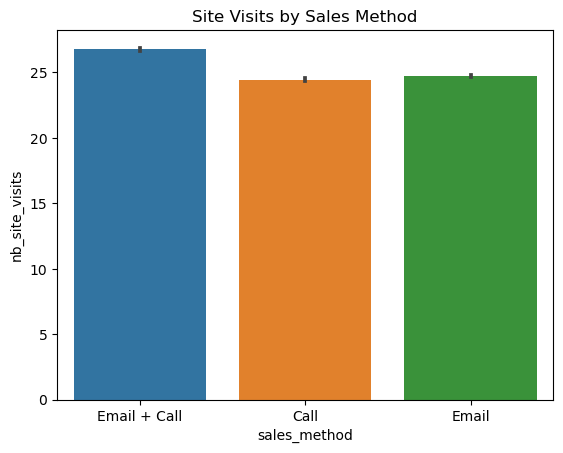

In [185]:
sites_method = sns.barplot(data=df, x='sales_method', y='nb_site_visits')
sites_method.set_title('Site Visits by Sales Method')
plt.show()